In [3]:
# Датасет Credit Card Fraud Detection Выявление мошеннических операций по кредитным картам.
# Только ~0.17% — мошенничество
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

from google.colab import files

uploaded = files.upload()  # Откроется окно выбора файла
# После загрузки файл появится в текущей рабочей директории

Saving creditcard.csv to creditcard.csv


   Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0

[5 rows x 31 columns]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


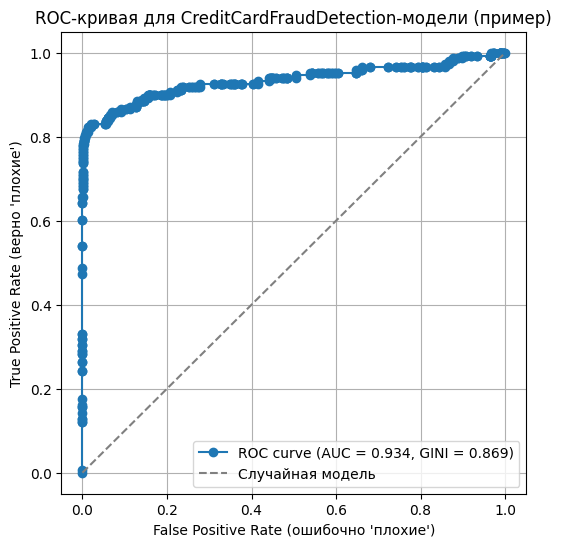

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
df = pd.read_csv('creditcard.csv')
print(df.head())
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

# 4. Предсказания и метрики
y_pred_proba = model.predict_proba(X_test)[:, 1]

FPR, TPR, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = auc(FPR, TPR)
gini = 2 * roc_auc - 1

# построим график
plt.figure(figsize=(6,6))
plt.plot(FPR, TPR, marker='o', label=f"ROC curve (AUC = {roc_auc:.3f}, GINI = {gini:.3f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Случайная модель")
plt.title("ROC-кривая для CreditCardFraudDetection-модели (пример)")
plt.xlabel("False Positive Rate (ошибочно 'плохие')")
plt.ylabel("True Positive Rate (верно 'плохие')")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()